In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score

# import warnings filter
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

# Exercícios

__1)__ Utilizando o _dataset_ para a classificação de casas em Paris, com as seguintes características dos dados:

- squareMeters - quantidade de metros quadrados;
- numberOfRooms - quantidade de quartos;
- hasYard - se têm ou não quintal;
- hasPool - se tem ou não piscina;
- floors - número de andares;
- cityCode - CEP;
- cityPartRange - quanto maior o valor mais exclusivo é a vizinhança;
- numPrevOwners - quantidade de donos anteriores;
- made - ano da fabricação;
- isNewBuilt - se é um imóvel novo;
- hasStormProtector - se têm proteção contra chuva;
- basement - tamanho do porão;
- attic - tamanho do sotão;
- garage - tamanho da garagem;
- hasStorageRoom - se têm ou não despensa;
- hasGuestRoom - número de quartos de hóspedes;
- price - preço da casa;
- category - marcação se a casa é luxuosa `Luxury` ou uma casa básica `Basic`.

A partir da descrição dos dados desenvolva os tópicos a seguir:

__A)__ Faça uma EDA para conhecer as características dos dados (façam gráficos, análise de correlações e etc.)

__B)__ Faça um modelo de Regressão onde a variável resposta será o preço dos imóveis. Teste os diferentes modelos vistos durante o curso. Avalie a importância dos atributos, se a variável `price` influência na resposta final do modelo e o quanto que impacta.

## 

__2)__ Utilizando o _dataset_ para a classificação de casas em Paris, com as seguintes características dos dados:

- squareMeters - quantidade de metros quadrados;
- numberOfRooms - quantidade de quartos;
- hasYard - se têm ou não quintal;
- hasPool - se tem ou não piscina;
- floors - número de andares;
- cityCode - CEP;
- cityPartRange - quanto maior o valor mais exclusivo é a vizinhança;
- numPrevOwners - quantidade de donos anteriores;
- made - ano da fabricação;
- isNewBuilt - se é um imóvel novo;
- hasStormProtector - se têm proteção contra chuva;
- basement - tamanho do porão;
- attic - tamanho do sotão;
- garage - tamanho da garagem;
- hasStorageRoom - se têm ou não despensa;
- hasGuestRoom - número de quartos de hóspedes;
- price - preço da casa;
- category - marcação se a casa é luxuosa `Luxury` ou uma casa básica `Basic`.

A partir da descrição dos dados desenvolva os tópicos a seguir:

__A)__ Faça uma EDA para conhecer as características dos dados (façam gráficos, análise de correlações e etc.)

__B)__ Avalie inicialmente as variáveis categóricas utilizando o Qui-Quadrado e o ANOVa. Busque entender se todas as variáveis categóricas são relevantes para a variável `category`. Desenvolva uma modelo de Regressão Logística e avalie o resultado do modelo e o impacto da variável `price` no desempenho do modelo.

## 

__3)__ A partir do _dataset_ sobre caranguejos, utilize um modelo de regressão para predizer a idade dos caranguejos. Faça uma EDA para conhecer os dados, desenvolva os modelos de Regressão apresentados em aula e faça uma análise da importância das variáveis.

In [4]:
crab = pd.read_csv("../datasets/CrabAgePrediction.csv")
crab.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [7]:
# Retirando dados duplicados do dataset
crab = crab.drop_duplicates()
crab

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


In [17]:
crab = crab.drop(['Sex'], axis = 1)

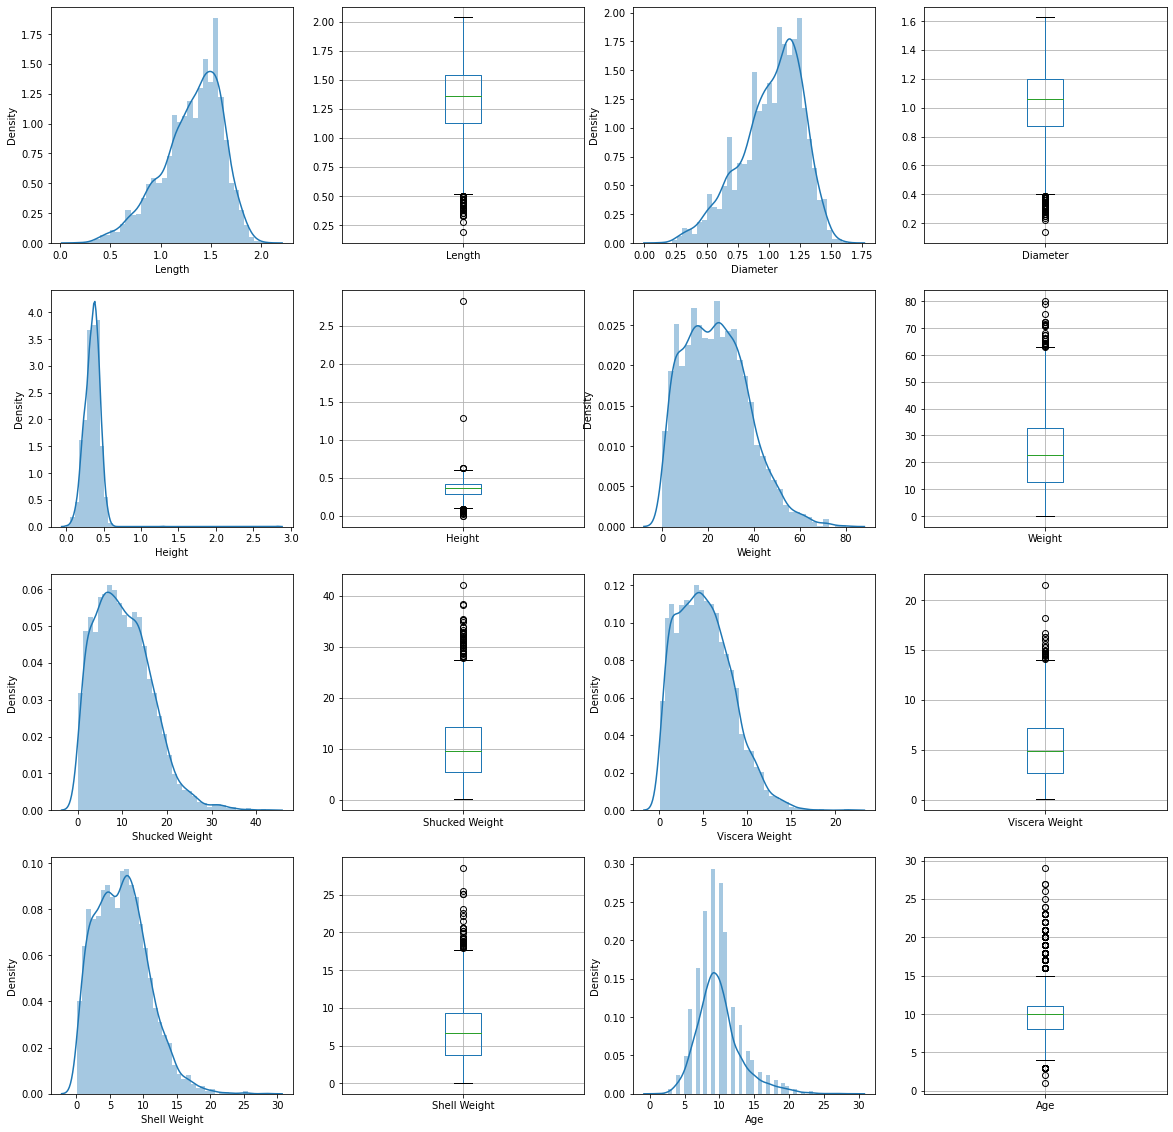

In [20]:
fig, ax = plt.subplots(5, 4, figsize=(20, 20))
ax = ax.flatten()
columns = crab.columns

for i, col in enumerate(columns):
    sns.distplot(crab[col], ax=ax[i+i])
    crab.boxplot(col, ax=ax[i+1+i])
    #print()
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

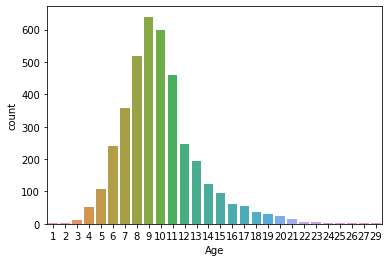

In [12]:
sns.countplot(x='Age', data = crab)

## 

__4)__ Utilizando o _dataset_ sobre o câncer de mama `breast_cancer.csv`, resolva os itens abaixo:

__A)__ Realize uma análise exploratória dos dados para conhecer melhor o dataset;

__B)__ Utilizando o raio médio como variável resposta, desenvolva uma Regressão Linear para fazer a predição. Teste diferentes modelos que foram vistos em aula. Faz sentido um modelo de predição desta forma?

__C)__ Desenvolva um modelo de Regressão Logística para predizer se o câncer seria maligno ou benigno, utilizando a
comovariável resposta `diagnosis`